In [1]:
import pandas as pd
import numpy as np
import re

C:\Users\OM CHAVAN\AppData\Local\Temp\ipykernel_16380\1346524901.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_row',None)
pd.set_option('display.max_columns',None)

In [3]:
df=pd.read_csv('gurgaon_properties_cleaned_v1.csv')

In [4]:
df.head(1)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,vatika city,sector 49,1.69,8622.0,1960.0,Carpet area: 1960 (182.09 sq.m.),3,3,3,pooja room,3.0,North,5 to 10 Year Old,"['BOB ATM', 'PNB ATM', 'HDFC bank ATM', 'YES bank ATM', 'Citibank ATM', 'Gurugram Hospital', 'Ektaa Hospital', 'Park Hospital', 'Polaris Hospital', 'Govind Hospital', ""Guls' Kitchen"", 'The Nook', 'Open Tap', 'Frescos', 'Subway']",NaN,"['Water purifier', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'False Ceiling Lighting', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"


In [5]:
# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features 

 # 1. areaWithType

In [6]:
df[['area','areaWithType']].sample(5)

,area,areaWithType
1530,2061.0,Super Built up area 1930(179.3 sq.m.)
3587,2048.0,Built Up area: 2050 (190.45 sq.m.)
198,728.0,Carpet area: 728 (67.63 sq.m.)
376,2860.0,Carpet area: 2860 (265.7 sq.m.)
267,1660.0,Super Built up area 1660(154.22 sq.m.)


In [7]:
# Function to extract the Super Built up Area

def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [8]:
# Function to extract the Built up Area or Carpet area

def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [9]:
# function to check if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [10]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [11]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3307,1.29,flat,1816.0,Super Built up area 1818(168.9 sq.m.)Built Up area: 1817 sq.ft. (168.8 sq.m.)Carpet area: 1816 sq.ft. (168.71 sq.m.),1818.0,1817.0,1816.0
354,3.00,flat,4891.0,Super Built up area 4890(454.3 sq.m.),4890.0,NaN,NaN
2543,1.93,flat,2390.0,Super Built up area 2408(223.71 sq.m.)Built Up area: 2400 sq.ft. (222.97 sq.m.)Carpet area: 2390 sq.ft. (222.04 sq.m.),2408.0,2400.0,2390.0
3447,0.80,house,763.0,Built Up area: 763 (70.89 sq.m.),NaN,763.0,NaN
481,15.00,house,6400.0,Built Up area: 6400 (594.58 sq.m.),NaN,6400.0,NaN


In [12]:
df.duplicated().sum()

122

In [13]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [14]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2,7.50,house,2160.0,Plot area 240(200.67 sq.m.)Built Up area: 241 sq.yards (201.51 sq.m.)Carpet area: 240 sq.yards (200.67 sq.m.),NaN,241.0,240.0
5,0.67,house,783.0,Plot area 87(72.74 sq.m.),NaN,NaN,NaN
8,0.49,house,436.0,Plot area 360(33.45 sq.m.),NaN,NaN,NaN
13,2.95,house,1449.0,Plot area 161(134.62 sq.m.)Built Up area: 1000 sq.yards (836.13 sq.m.),NaN,1000.0,NaN
14,8.49,house,2700.0,Plot area 300(250.84 sq.m.),NaN,NaN,NaN


In [15]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                147
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [16]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [17]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
5,0.67,house,783.0,Plot area 87(72.74 sq.m.),NaN,NaN,NaN
8,0.49,house,436.0,Plot area 360(33.45 sq.m.),NaN,NaN,NaN
14,8.49,house,2700.0,Plot area 300(250.84 sq.m.),NaN,NaN,NaN
17,4.25,house,1350.0,Plot area 150(125.42 sq.m.),NaN,NaN,NaN
26,0.99,house,576.0,Plot area 64(53.51 sq.m.),NaN,NaN,NaN


In [18]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [19]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [20]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [21]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
5,0.67,house,783.0,Plot area 87(72.74 sq.m.),NaN,87.00,NaN
8,0.49,house,436.0,Plot area 360(33.45 sq.m.),NaN,360.00,NaN
14,8.49,house,2700.0,Plot area 300(250.84 sq.m.),NaN,300.00,NaN
17,4.25,house,1350.0,Plot area 150(125.42 sq.m.),NaN,150.00,NaN
26,0.99,house,576.0,Plot area 64(53.51 sq.m.),NaN,64.00,NaN
28,0.65,house,500.0,Plot area 500(46.45 sq.m.),NaN,500.00,NaN
31,9.85,house,3323.0,Plot area 418(349.5 sq.m.),NaN,418.00,NaN
42,13.00,house,2844.0,Plot area 316(264.22 sq.m.),NaN,316.00,NaN
47,8.25,house,1800.0,Plot area 200(167.23 sq.m.),NaN,200.00,NaN
48,0.80,house,675.0,Plot area 75(62.71 sq.m.),NaN,75.00,NaN


In [22]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [23]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [24]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
5,0.67,house,783.0,Plot area 87(72.74 sq.m.),NaN,783.00,NaN
8,0.49,house,436.0,Plot area 360(33.45 sq.m.),NaN,360.00,NaN
14,8.49,house,2700.0,Plot area 300(250.84 sq.m.),NaN,2700.00,NaN
17,4.25,house,1350.0,Plot area 150(125.42 sq.m.),NaN,1350.00,NaN
26,0.99,house,576.0,Plot area 64(53.51 sq.m.),NaN,576.00,NaN
28,0.65,house,500.0,Plot area 500(46.45 sq.m.),NaN,500.00,NaN
31,9.85,house,3323.0,Plot area 418(349.5 sq.m.),NaN,418.00,NaN
42,13.00,house,2844.0,Plot area 316(264.22 sq.m.),NaN,2844.00,NaN
47,8.25,house,1800.0,Plot area 200(167.23 sq.m.),NaN,1800.00,NaN
48,0.80,house,675.0,Plot area 75(62.71 sq.m.),NaN,675.00,NaN


In [25]:
# update the original dataframe
df.update(all_nan_df)

In [26]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                147
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

In [27]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,vatika city,sector 49,1.69,8622.0,1960.0,Carpet area: 1960 (182.09 sq.m.),3,3,3,pooja room,3.0,North,5 to 10 Year Old,"['BOB ATM', 'PNB ATM', 'HDFC bank ATM', 'YES bank ATM', 'Citibank ATM', 'Gurugram Hospital', 'Ektaa Hospital', 'Park Hospital', 'Polaris Hospital', 'Govind Hospital', ""Guls' Kitchen"", 'The Nook', 'Open Tap', 'Frescos', 'Subway']",NaN,"['Water purifier', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'False Ceiling Lighting', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,NaN,1960.0
1,flat,pareena coban residences,sector 99a,1.10,7096.0,1550.0,Super Built up area 1550(144 sq.m.)Carpet area: 1200 sq.ft. (111.48 sq.m.),2,2,3,study room,9.0,North-East,0 to 1 Year Old,"['Gopal Super Market', 'Little Need Super Market', 'JMS Marine Square Mall', 'Adarsh Public School', 'Basant Lal Memorial College', 'Govt School', 'Rishikul College', 'HDFC Bank ATM', 'Shri Balaji Hospital', 'Shree Krishna Hospital', 'IGI Airport', 'YES Bank', 'Bank of Baroda', 'Garhi Harsaru Junction', 'Park INN']","['1 Modular Kitchen', '4 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']",1550.0,NaN,1200.0
2,house,unitech espace,sector 50,7.50,34722.0,2160.0,Plot area 240(200.67 sq.m.)Built Up area: 241 sq.yards (201.51 sq.m.)Carpet area: 240 sq.yards (200.67 sq.m.),3,3,2,servant room,2.0,West,5 to 10 Year Old,"['Radhakrishna Shani Mandir', 'Sri Radhe Krishna Temple', 'Standard chartered ATM', 'Icici bank ATM', 'Vatsalya Clinic', 'Bones Clinic - Orthopaedics', 'Skin Clinic', 'Divine Look Clinic Centre', 'Meher Clinic', 'Dr. Naresh Pandita', 'Dr. Anuj Sharma', 'Vishesh Dental', 'Neelkanth Health Care', 'Park Hospital Gurgaon', 'Dr. Aruna Kalra', 'Wellness Eye Centre', 'Best Urologist Atcomplete Family Clinic', 'Sanjeevani Hospital Gurgaon', 'Sai Heart and Trauma Center', 'Ekta Hospital', 'Sona Devi Memorial Hospital and Trauma Centre', 'Sai Dharamraj Hospital', 'Wembley estate club', 'Genius', 'Gardian Pharmacy', 'Apollo Pharmacy', 'SPAZE BUSINESS PARK', 'Unitech', 'Hdfc bank', 'Hdfc bank', 'Hdfc bank', 'Indusind bank', 'Icici bank', 'Central bank of india', 'SRS Cinemas', 'Madison and Pike', 'India', 'Haldiram', 'Starbucks', 'Nook', ""Domino's Pizza"", ""Nirula's"", 'Kamla International', 'Gurugram University', 'Delhi Public School Primary Section', 'Amity Global School']","['1 Exhaust Fan', '4 Geyser', '1 Stove', '1 Microwave', '18 Light', '4 AC', '1 Modular Kitchen', '1 Chimney', '1 Curtains', 'No Bed', 'No Dining Table', 'No Fan', 'No Fridge', 'No Sofa', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'High Ceiling Height', 'Maintenance Staff', 'Separate entry for servant room', 'No open drainage around', 'Park', 'Visitor Parking', 'Natural Light', 'Airy Rooms', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,241.0,240.0

# 2.additionalRoom

In [28]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
study room,servant room                            99
store room                                         99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
servant room,

In [29]:
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [30]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
1960,not available,0,0,0,0,0
3541,servant room,0,1,0,0,0
2074,store room,0,0,1,0,0
4,"pooja room,study room,servant room,others",1,1,0,1,1
3748,"pooja room,servant room",0,1,0,1,0


In [31]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,vatika city,sector 49,1.69,8622.0,1960.0,Carpet area: 1960 (182.09 sq.m.),3,3,3,pooja room,3.0,North,5 to 10 Year Old,"['BOB ATM', 'PNB ATM', 'HDFC bank ATM', 'YES bank ATM', 'Citibank ATM', 'Gurugram Hospital', 'Ektaa Hospital', 'Park Hospital', 'Polaris Hospital', 'Govind Hospital', ""Guls' Kitchen"", 'The Nook', 'Open Tap', 'Frescos', 'Subway']",NaN,"['Water purifier', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'False Ceiling Lighting', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,NaN,1960.0,0,0,0,1,0
1,flat,pareena coban residences,sector 99a,1.10,7096.0,1550.0,Super Built up area 1550(144 sq.m.)Carpet area: 1200 sq.ft. (111.48 sq.m.),2,2,3,study room,9.0,North-East,0 to 1 Year Old,"['Gopal Super Market', 'Little Need Super Market', 'JMS Marine Square Mall', 'Adarsh Public School', 'Basant Lal Memorial College', 'Govt School', 'Rishikul College', 'HDFC Bank ATM', 'Shri Balaji Hospital', 'Shree Krishna Hospital', 'IGI Airport', 'YES Bank', 'Bank of Baroda', 'Garhi Harsaru Junction', 'Park INN']","['1 Modular Kitchen', '4 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']",1550.0,NaN,1200.0,1,0,0,0,0
2,house,unitech espace,sector 50,7.50,34722.0,2160.0,Plot area 240(200.67 sq.m.)Built Up area: 241 sq.yards (201.51 sq.m.)Carpet area: 240 sq.yards (200.67 sq.m.),3,3,2,servant room,2.0,West,5 to 10 Year Old,"['Radhakrishna Shani Mandir', 'Sri Radhe Krishna Temple', 'Standard chartered ATM', 'Icici bank ATM', 'Vatsalya Clinic', 'Bones Clinic - Orthopaedics', 'Skin Clinic', 'Divine Look Clinic Centre', 'Meher Clinic', 'Dr. Naresh Pandita', 'Dr. Anuj Sharma', 'Vishesh Dental', 'Neelkanth Health Care', 'Park Hospital Gurgaon', 'Dr. Aruna Kalra', 'Wellness Eye Centre', 'Best Urologist Atcomplete Family Clinic', 'Sanjeevani Hospital Gurgaon', 'Sai Heart and Trauma Center', 'Ekta Hospital', 'Sona Devi Memorial Hospital and Trauma Centre', 'Sai Dharamraj Hospital', 'Wembley estate club', 'Genius', 'Gardian Pharmacy', 'Apollo Pharmacy', 'SPAZE BUSINESS PARK', 'Unitech', 'Hdfc bank', 'Hdfc bank', 'Hdfc bank', 'Indusind bank', 'Icici bank', 'Central bank of india', 'SRS Cinemas', 'Madison and Pike', 'India', 'Haldiram', 'Starbucks', 'Nook', ""Domino's Pizza"", ""Nirula's"", 'Kamla International', 'Gurugram University', 'Delhi Public School Primary Section', 'Amity Global School']","['1 Exhaust Fan', '4 Geyser', '1 Stove', '1 Microwave', '18 Light', '4 AC', '1 Modular Kitchen', '1 Chimney', '1 Curtains', 'No Bed', 'No Dining Table', 'No Fan', 'No Fridge', 'No Sofa', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'High Ceiling Height', 'Maintenance Staff', 'Separate entry for servant room', 'No open drainage around', 'Park', 'Visitor Parking', 'Natural Light', 'Airy Rooms', 

# 3.agePossession

In [32]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec-23                  20
By 2023                 19
By 2024                 17
Dec-24                  15
Mar-24                  14
Oct-24                   7
Aug-23                   7
Jan-24                   7
Dec-25                   7
Jun-24                   5
Nov-23                   5
Sep-23                   4
By 2025                  4
Jul-24                   4
Aug-24                   4
Jan-25                   3
Oct-23                   3
Feb-24                   3
May-24                   3
Nov-24                   3
Dec 2023                 2
Jun-27                   2
Sep-25                   2
By 2027                  2
Jul-27                   2
Jan-26                   2
Jul-25                   2
Mar-25                   2
Jun 2024      

In [33]:
def categorized_age_possession(value):
    if pd.isna(value):
        return 'undefined'
    if '0 to 1 Year Old' in value or "Within 6 months" in value or "Within 3 months" in value:
        return 'New Property'
    if '1 to 5 Year Old' in value:
        return 'Relatively New'
    if '5 to 10 Year Old' in value:
        return 'Moderately Old'
    if '10+ Year Old' in value:
        return 'Old Property'
    if 'Under Construction' in value or "By" in value:
        return 'Under Construction'
    try :
        # for entries like Dec 2023
        int(value.split(' ')[-1])
        return 'Under Construction'
    except:
        return 'Undefined'

In [34]:
df['agePossession']=df['agePossession'].apply(categorized_age_possession)

In [35]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              475
Old Property           310
Under Construction     140
undefined                1
Name: count, dtype: int64

In [36]:
# Undefined -> 475 may strike as a problem in future but till now it's ok 

# 4.furnishDetails

In [37]:
df.sample(5)[["furnishDetails","features"]]

,furnishDetails,features
201,"['6 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
2090,"['1 Water Purifier', '4 Fan', '1 Fridge', '1 Exhaust Fan', '5 Geyser', '1 Stove', '5 Light', '5 AC', '1 Modular Kitchen', '1 Chimney', '1 Curtains', '5 Wardrobe', '1 Washing Machine', 'No Bed', 'No Dining Table', 'No Microwave', 'No Sofa', 'No TV']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Low Density Society', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
1763,[],"['Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Club house / Community Center', 'Fitness Centre / GYM', 'Shopping Centre']"
3105,NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Maintenance Staff', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']"
1075,"['1 Water Purifier', '4 Fan', '1 Exhaust Fan', '6 Light', '1 Chimney', '1 Curtains', 'No AC', 'No Bed', 'No Dining Table', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine']","['Security / Fire Alarm', 'Power Back-up', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Visitor Parking', 'Park', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Water softening plant']"


In [38]:
 # Extract all unique furnishings from the furnishDetails column

all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

In [39]:
# Define a function to extract the count of a furnishing from the furnishDetails

def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

In [40]:
# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

In [41]:
# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

In [42]:
furnishings_df.shape

(3803, 19)

In [44]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

KeyError: "['furnishDetails'] not found in axis"

In [45]:
furnishings_df.sample(5)

,Wardrobe,Fan,TV,Modular Kitchen,Dining Table,Washing Machine,Geyser,Fridge,Exhaust Fan,Chimney,AC,Microwave,Light,Curtains,Bed,Stove,Water Purifier,Sofa
2624,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2866,0,0,0,1,0,0,0,0,0,0,0,0,40,0,0,0,0,0
773,2,3,0,1,0,0,1,1,1,0,1,0,4,1,0,0,1,1
856,1,0,0,1,0,0,0,0,1,1,0,0,6,0,0,0,0,0
2494,7,6,0,1,0,0,5,0,1,1,6,0,20,0,0,1,1,0


In [46]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [48]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

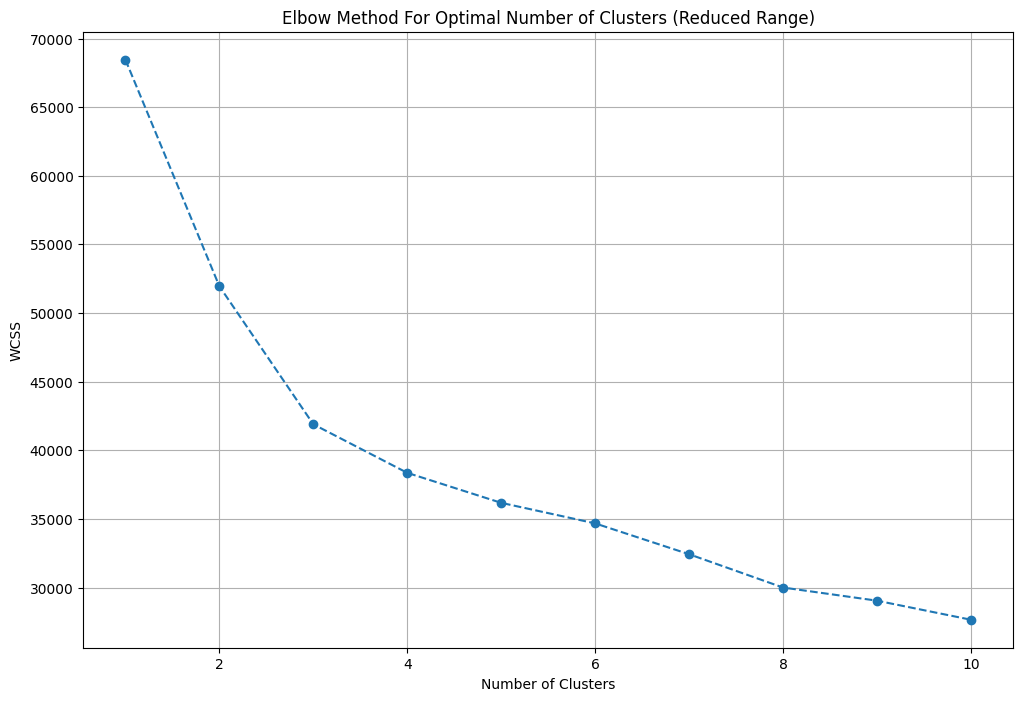

In [49]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [50]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [51]:
df = df.iloc[:,:-18]

In [52]:
df['furnishing_type'] = cluster_assignments

In [54]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 for unfurnished
# 1 for semifurnished
# 2 for furnished

,furnishDetails,furnishing_type
1759,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0
2368,NaN,0
829,"['1 Fan', '1 Geyser', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0
1104,"['1 Fan', '1 Geyser', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0
2008,"['1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0


# 5.features

In [57]:
df[['society','features']].head()

,society,features
0,vatika city,"['Water purifier', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'False Ceiling Lighting', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
1,pareena coban residences,"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']"
2,unitech espace,"['Feng Shui / Vaastu Compliant', 'High Ceiling Height', 'Maintenance Staff', 'Separate entry for servant room', 'No open drainage around', 'Park', 'Visitor Parking', 'Natural Light', 'Airy Rooms', 'Fitness Centre / GYM', 'Club house / Community Center']"
3,central park resort belgravia residences,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
4,dlf the ultima,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"


In [56]:
df[['features']].isnull().sum()

features    635
dtype: int64

In [58]:
import pandas as pd
app_df=pd.read_csv('appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [59]:
app_df['PropertyName']=app_df['PropertyName'].str.lower()

In [60]:
temp_df=df[df['features'].isnull()]

In [61]:
temp_df.shape

(635, 26)

In [62]:
temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')[['features','TopFacilities']]

,features,TopFacilities
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,"['Swimming Pool', 'Lounge', 'Medical Centre', 'Conference room', 'Salon', 'Card Room', 'Visitors Parking', 'Restaurant', 'Terrace Garden']"
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [64]:
x=temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [66]:
df.loc[temp_df.index,'features']=x.values

In [67]:
df['features'].isnull().sum()

481

In [68]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [69]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [70]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
378,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
532,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3764,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
849,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [71]:
features_binary_df.shape

(3803, 130)

In [72]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

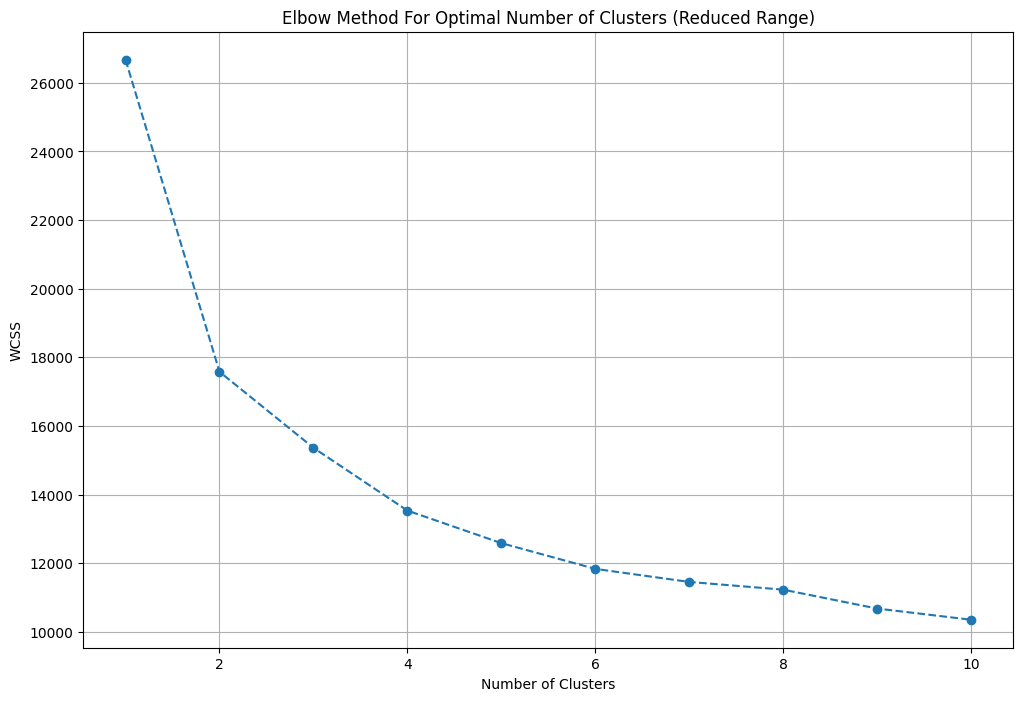

In [73]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [ ]:
# Changed the Approch as it seems two cluster is to be made
# the changed approch was to rate the feature on the luxury score

In [74]:
# Define the weights for each feature as provided
# Asked Chat-Gpt to Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [76]:
df['luxaury_score']=luxury_score

In [77]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxaury_score
0,flat,vatika city,sector 49,1.69,8622.0,1960.0,Carpet area: 1960 (182.09 sq.m.),3,3,3,pooja room,3.0,North,Moderately Old,"['BOB ATM', 'PNB ATM', 'HDFC bank ATM', 'YES bank ATM', 'Citibank ATM', 'Gurugram Hospital', 'Ektaa Hospital', 'Park Hospital', 'Polaris Hospital', 'Govind Hospital', ""Guls' Kitchen"", 'The Nook', 'Open Tap', 'Frescos', 'Subway']",NaN,"['Water purifier', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'False Ceiling Lighting', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,NaN,1960.0,0,0,0,1,0,0,"[Water purifier, Power Back-up, Feng Shui / Vaastu Compliant, Private Garden / Terrace, Intercom Facility, Lift(s), High Ceiling Height, False Ceiling Lighting, Separate entry for servant room, No open drainage around, Piped-gas, Internet/wi-fi connectivity, Recently Renovated, Visitor Parking, Swimming Pool, Park, Security Personnel, Natural Light, Airy Rooms, Spacious Interiors, Waste Disposal, Rain Water Harvesting, Water softening plant, Shopping Centre, Fitness Centre / GYM, Club house / Community Center]",136
1,flat,pareena coban residences,sector 99a,1.10,7096.0,1550.0,Super Built up area 1550(144 sq.m.)Carpet area: 1200 sq.ft. (111.48 sq.m.),2,2,3,study room,9.0,North-East,New Property,"['Gopal Super Market', 'Little Need Super Market', 'JMS Marine Square Mall', 'Adarsh Public School', 'Basant Lal Memorial College', 'Govt School', 'Rishikul College', 'HDFC Bank ATM', 'Shri Balaji Hospital', 'Shree Krishna Hospital', 'IGI Airport', 'YES Bank', 'Bank of Baroda', 'Garhi Harsaru Junction', 'Park INN']","['1 Modular Kitchen', '4 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']",1550.0,NaN,1200.0,1,0,0,0,0,0,"[Security / Fire Alarm, Power Back-up, Feng Shui / Vaastu Compliant, Intercom Facility, Lift(s), Maintenance Staff, Water Storage, Piped-gas, Visitor Parking, Swimming Pool, Park, Security Personnel, Shopping Centre, Fitness Centre / GYM, Rain Water Harvesting, Club house / Community Center]",88
2,house,unitech espace,sector 50,7.50,34722.0,2160.0,Plot area 240(200.67 sq.m.)Built Up area: 241 sq.yards (201.51 sq.m.)Carpet area: 240 sq.yards (200.67 sq.m.),3,3,2,servant room,2.0,West,Moderately Old,"['Radhakrishna Shani Mandir', 'Sri Radhe Krishna Temple', 'Standard chartered ATM', 'Icici bank ATM', 'Vatsalya Clinic', 'Bones Clinic - Orthopaedics', 'Skin Clinic', 'Divine Look Clinic Centre', 'Meher Clinic', 'Dr. Naresh Pandita', 'Dr. Anuj Sharma', 'Vishesh Dental', 'Neelkanth Health Care', 'Park Hospital Gurgaon', 'Dr. Aruna Kalra', 'Wellness Eye Centre', 'Best Urologist Atcomplete Family Clinic', 'Sanjeevani Hospital Gurgaon', 'Sai Heart and Trauma Center', 'Ekta Hospital', 'Sona Devi Memorial Hospital and Trauma Centre', 'Sai Dharamraj Hospital', 'Wembley estat

In [78]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [79]:
df.sample()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxaury_score
1108,flat,sare crescent parc,sector 92,1.0,5128.0,1950.0,Carpet area: 1950 (181.16 sq.m.),4,3,2,1.0,East,Relatively New,NaN,NaN,1950.0,0,0,0,0,0,0,49


In [81]:
df.shape

(3803, 23)

In [82]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)